## 7일차 주성분 분석
### 데이터 표준화 이후, 주성분 분석을 실시하여 2차원(1 vs 2 주성분, 1 vs 3 주성분, …) 산점도를 그려라.(목표변수로 색 구분), + 주성분 naming
### 데이터 : 유방암 데이터(변수: 31개, 자료 수: 569개)
### -목표변수(diagnosis, 0: Malignant(악성,357개), 1: Benign(양성,212개)

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# 주성분 분석
from sklearn.decomposition import PCA
# 상관계수 계산
from scipy import stats
# 데이터 표준화 함수
from sklearn.preprocessing import StandardScaler
plt.rc('font',family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus']=False

In [2]:
bcancer = pd.read_csv("./과제파일/유방암.csv",engine = "python")
bcancer.isnull().sum() # 결측치 없음
# 여기서 중요한 건 주성분분석이라 Xs 분리 필요함.
bcancer_x = bcancer.drop("diagnosis", axis =1)
bcancer_y = bcancer["diagnosis"]
bcancer_x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
bcancer_x.corr().round(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000,0.324,0.998,0.987,0.171,0.506,0.677,0.823,0.148,-0.312,...,0.970,0.297,0.965,0.941,0.120,0.413,0.527,0.744,0.164,0.007
mean texture,0.324,1.000,0.330,0.321,-0.023,0.237,0.302,0.293,0.071,-0.076,...,0.353,0.912,0.358,0.344,0.078,0.278,0.301,0.295,0.105,0.119
mean perimeter,0.998,0.330,1.000,0.987,0.207,0.557,0.716,0.851,0.183,-0.261,...,0.969,0.303,0.970,0.942,0.151,0.456,0.564,0.771,0.189,0.051
mean area,0.987,0.321,0.987,1.000,0.177,0.499,0.686,0.823,0.151,-0.283,...,0.963,0.287,0.959,0.959,0.124,0.390,0.513,0.722,0.144,0.004
mean smoothness,0.171,-0.023,0.207,0.177,1.000,0.659,0.522,0.554,0.558,0.585,...,0.213,0.036,0.239,0.207,0.805,0.472,0.435,0.503,0.394,0.499
mean compactness,0.506,0.237,0.557,0.499,0.659,1.000,0.883,0.831,0.603,0.565,...,0.535,0.248,0.590,0.510,0.566,0.866,0.816,0.816,0.510,0.687
mean concavity,0.677,0.302,0.716,0.686,0.522,0.883,1.000,0.921,0.501,0.337,...,0.688,0.300,0.730,0.676,0.449,0.755,0.884,0.861,0.409,0.515
mean concave points,0.823,0.293,0.851,0.823,0.554,0.831,0.921,1.000,0.462,0.167,...,0.830,0.293,0.856,0.810,0.453,0.667,0.752,0.910,0.376,0.369
mean symmetry,0.148,0.071,0.183,0.151,0.558,0.603,0.501,0.462,1.000,0.480,...,0.186,0.091,0.219,0.177,0.427,0.473,0.434,0.430,0.700,0.438
mean fractal dimension,-0.312,-0.076,-0.261,-0.283,0.585,0.565,0.337,0.167,0.480,1.000,...,-0.254,-0.051,-0.205,-0.232,0.505,0.459,0.346,0.175,0.334,0.767


In [4]:
#sns.pairplot(bcancer_x)

## 데이터 표준화(이유: 설명변수 간에 단위(scale)가 다름.)

In [5]:
# 데이터 표준화
scaler = StandardScaler()
# 데이터 표준화 변환
bcancer_x_scaled = scaler.fit_transform(bcancer_x)
# 표준화된 데이터 확인
print("Scaled Data:\n {}".format(bcancer_x_scaled[:5].round(3)))
# 데이터 형태 확인
print("Shape:\n {}".format(bcancer_x_scaled.shape))

Scaled Data:
 [[ 1.097e+00 -2.073e+00  1.270e+00  9.840e-01  1.568e+00  3.284e+00
   2.653e+00  2.532e+00  2.218e+00  2.256e+00  2.490e+00 -5.650e-01
   2.833e+00  2.488e+00 -2.140e-01  1.317e+00  7.240e-01  6.610e-01
   1.149e+00  9.070e-01  1.887e+00 -1.359e+00  2.304e+00  2.001e+00
   1.308e+00  2.617e+00  2.110e+00  2.296e+00  2.751e+00  1.937e+00]
 [ 1.830e+00 -3.540e-01  1.686e+00  1.909e+00 -8.270e-01 -4.870e-01
  -2.400e-02  5.480e-01  1.000e-03 -8.690e-01  4.990e-01 -8.760e-01
   2.630e-01  7.420e-01 -6.050e-01 -6.930e-01 -4.410e-01  2.600e-01
  -8.050e-01 -9.900e-02  1.806e+00 -3.690e-01  1.535e+00  1.890e+00
  -3.760e-01 -4.300e-01 -1.470e-01  1.087e+00 -2.440e-01  2.810e-01]
 [ 1.580e+00  4.560e-01  1.567e+00  1.559e+00  9.420e-01  1.053e+00
   1.363e+00  2.037e+00  9.400e-01 -3.980e-01  1.229e+00 -7.800e-01
   8.510e-01  1.181e+00 -2.970e-01  8.150e-01  2.130e-01  1.425e+00
   2.370e-01  2.940e-01  1.512e+00 -2.400e-02  1.347e+00  1.456e+00
   5.270e-01  1.083e+00  8.550e-

## 주성분 분석 실행

In [6]:
# 주성분 분석 모델 생성. prin 1~6까지
pca = PCA(n_components=30)
# prin1~6까지의 새로운 변수 값을 생성
x_pca = pca.fit_transform(bcancer_x_scaled) #.round(3) 해도 되고 안해도 되고
# 계산된 prin1~6 주성분 변수의 5번째 값까지 확인
print("PCA Data:\n {}".format(x_pca[:5]))
# Shape: prin1~6까지의 Row개수, Column개수 확인
print("Shape:\n {}".format(x_pca.shape))
# 주성분 점수 저장. prin1~6
ds_x_pca = pd.DataFrame(x_pca, columns = ["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6","Prin7","Prin8","Prin9","Prin10",\
                                         "Prin11","Prin12","Prin13","Prin14","Prin15","Prin16","Prin17","Prin18","Prin19","Prin20",\
                                         "Prin21","Prin22","Prin23","Prin24","Prin25","Prin26","Prin27","Prin28","Prin29","Prin30"])

PCA Data:
 [[ 9.19283683e+00  1.94858307e+00 -1.12316616e+00  3.63373090e+00
  -1.19511012e+00  1.41142445e+00  2.15936987e+00 -3.98407230e-01
  -1.57118359e-01 -8.77401880e-01  2.62955455e-01 -8.59014477e-01
   1.03387665e-01 -6.90804097e-01 -6.01793127e-01  7.45115792e-01
  -2.65470777e-01 -5.49562693e-01 -1.33767500e-01  3.45564905e-01
   9.65148929e-02  6.88499220e-02  8.45185932e-02 -1.75256284e-01
  -1.51020059e-01 -2.01503451e-01 -2.52584993e-01 -3.39144536e-02
   4.56477199e-02 -4.71692081e-02]
 [ 2.38780180e+00 -3.76817174e+00 -5.29292687e-01  1.11826386e+00
   6.21774980e-01  2.86563545e-02  1.33580935e-02  2.40988459e-01
  -7.11904816e-01  1.10699494e+00  8.13119658e-01  1.57922585e-01
  -9.43529283e-01 -6.53475327e-01  8.97486713e-03 -6.48808694e-01
  -1.72122035e-02  3.18297381e-01  2.47564629e-01 -1.14133080e-01
  -7.73274741e-02 -9.45784509e-02 -2.17718064e-01  1.12901180e-02
  -1.70510254e-01 -4.11287846e-02  1.81270166e-01  3.26241827e-02
  -5.68742432e-03 -1.86787626e

## 고유값(Eigenvalue) 확인(몇 개까지 가져갈 지 보기위해)

In [7]:
# 주성분 통계량 입력용 새로운 데이터 프레임 생성
ds_pca = pd.DataFrame()
# 주성분 분석 모델의 주성분 번호, Eigenvalue, Eigenvalue ratio 등을 데이터 프레임의 형태로 저장
ds_pca["Prin"] = [i for i in range(1,31)]
ds_pca["EigenValues"] = pca.explained_variance_ ##Eigen values
ds_pca["EigenValueRatio"] = pca.explained_variance_ratio_ ##Eighen values ratio
ds_pca["CumsumEigenValueRatio"] = np.cumsum(pca.explained_variance_ratio_)
ds_pca.round(3)

,Prin,EigenValues,EigenValueRatio,CumsumEigenValueRatio
0,1,13.305,0.443,0.443
1,2,5.701,0.190,0.632
2,3,2.823,0.094,0.726
3,4,1.984,0.066,0.792
4,5,1.652,0.055,0.847
5,6,1.209,0.040,0.888
6,7,0.676,0.023,0.910
7,8,0.477,0.016,0.926
8,9,0.418,0.014,0.940
9,10,0.351,0.012,0.952


## 고유벡터(Eigenvector)확인

In [9]:
# 주성분 통계량 입력용 새로운 데이터 프레임 생성
ds_feature = pd.DataFrame({"Feature":bcancer_x.columns})
# 주성분 Prin 1~6까지의 고유벡터 저장
ds_eigenvectors = pd.concat([ds_feature,pd.DataFrame(pca.components_,columns=["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6","Prin7","Prin8","Prin9","Prin10",\
                                         "Prin11","Prin12","Prin13","Prin14","Prin15","Prin16","Prin17","Prin18","Prin19","Prin20",\
                                         "Prin21","Prin22","Prin23","Prin24","Prin25","Prin26","Prin27","Prin28","Prin29","Prin30"])],axis = 1)
ds_eigenvectors

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7,Prin8,Prin9,...,Prin21,Prin22,Prin23,Prin24,Prin25,Prin26,Prin27,Prin28,Prin29,Prin30
0,mean radius,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,mean texture,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
2,mean perimeter,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074092,0.002734,-0.025564,-0.040240,...,-0.047507,-0.042298,-0.048547,-0.011902,-0.259798,-0.236076,-0.173057,-0.170344,-0.271313,-0.232791
3,mean area,0.041409,-0.603050,0.041983,0.053434,0.159383,0.031795,0.019123,0.065336,0.067125,...,0.015417,-0.632808,0.013803,0.025895,0.017652,-0.091328,-0.073951,0.006007,-0.036251,-0.077053
4,mean smoothness,0.037786,-0.049469,0.037375,0.010331,-0.365089,0.011704,0.086375,-0.043861,-0.305941,...,-0.004407,-0.092883,0.007454,-0.027391,-0.324435,0.121804,0.188519,0.043332,-0.244559,0.094423
5,mean compactness,0.018741,-0.032179,0.017308,-0.001888,-0.286374,-0.014131,-0.009344,-0.052050,0.356458,...,-0.000291,-0.050008,0.008501,-0.025164,-0.369255,0.047706,0.028379,-0.030873,0.498927,-0.080224
6,mean concavity,-0.124088,0.011400,-0.114477,-0.051653,-0.140669,0.030918,-0.107520,-0.150482,-0.093891,...,-0.009710,0.009871,-0.000446,0.067832,-0.108831,0.140473,-0.060488,-0.167967,-0.018491,0.374658
7,mean concave points,-0.007452,0.130675,-0.018687,0.034674,-0.288975,-0.151396,-0.072827,-0.152322,-0.231531,...,0.042619,0.036252,0.030559,0.079394,0.205852,0.084020,0.072468,-0.036171,0.228225,0.048361
8,mean symmetry,-0.223110,0.112699,-0.223739,-0.195586,0.006425,-0.167841,0.040591,-0.111971,0.256040,...,-0.112141,0.103341,-0.109614,-0.080732,0.112316,-0.100678,0.161909,0.060488,0.064638,-0.134174
9,mean fractal dimension,0.095486,0.240934,0.086386,0.074956,-0.069293,0.012936,-0.135602,0.008055,0.572069,...,0.077362,0.029551,0.050508,0.069921,-0.128305,-0.172134,-0.311639,-0.076648,-0.029563,0.012610


## Scree Plot 확인

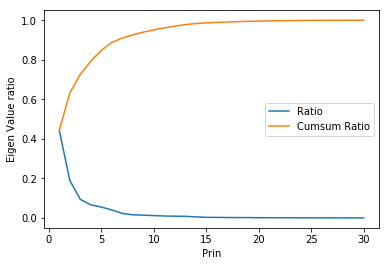

In [10]:
# 고유값 비율 그래프 생성
plt.plot(ds_pca["Prin"], ds_pca["EigenValueRatio"],label = "Ratio")
# 누적된 고유값 비율 그래프 생성
plt.plot(ds_pca["Prin"], ds_pca["CumsumEigenValueRatio"],label="Cumsum Ratio")
# 그래프 label, legend 설정
plt.ylabel("Eigen Value ratio")
plt.xlabel("Prin")
plt.legend(loc="best")

### EigenValue 기준 4개의 주성분으로 약 80%를 설명할 수 있음.

In [11]:
ds_x_pca.corr().round(3)

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7,Prin8,Prin9,Prin10,...,Prin21,Prin22,Prin23,Prin24,Prin25,Prin26,Prin27,Prin28,Prin29,Prin30
Prin1,1.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,...,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0
Prin2,-0.0,1.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,...,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0
Prin3,0.0,0.0,1.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,...,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0
Prin4,-0.0,0.0,0.0,1.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,...,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0
Prin5,0.0,0.0,-0.0,-0.0,1.0,-0.0,0.0,0.0,-0.0,-0.0,...,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0
Prin6,-0.0,-0.0,-0.0,0.0,-0.0,1.0,-0.0,0.0,0.0,-0.0,...,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0
Prin7,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,1.0,0.0,-0.0,-0.0,...,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0
Prin8,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,1.0,-0.0,-0.0,...,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0
Prin9,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,1.0,0.0,...,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0
Prin10,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,1.0,...,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0


In [13]:
# 회귀분석 패키지 불러오기
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
# Scree plot을이용하여 선택한 주성분
x_var = ["Prin1","Prin2","Prin3","Prin4"]
# 기존 주성분 데이터에 절편(Intercept)컬럼 추가
ds_x_pca_const = sm.add_constant(ds_x_pca[x_var])
# train, test 데이터로분할
X_train, X_test, y_train, y_test = train_test_split(ds_x_pca_const, bcancer_y, test_size = 0.3, random_state = 2222)
# train 데이터로 회귀분석 모델 생성
reg_model = sm.OLS(y_train, X_train)
# fit: 회귀모형의 fit line 생성
reg_model = reg_model.fit()
# Summary(): 회귀분석 통계량 결과 확인
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     239.1
Date:                Thu, 14 Feb 2019   Prob (F-statistic):          7.46e-104
Time:                        00:05:41   Log-Likelihood:                -31.449
No. Observations:                 398   AIC:                             72.90
Df Residuals:                     393   BIC:                             92.83
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3673      0.013     27.791      0.0

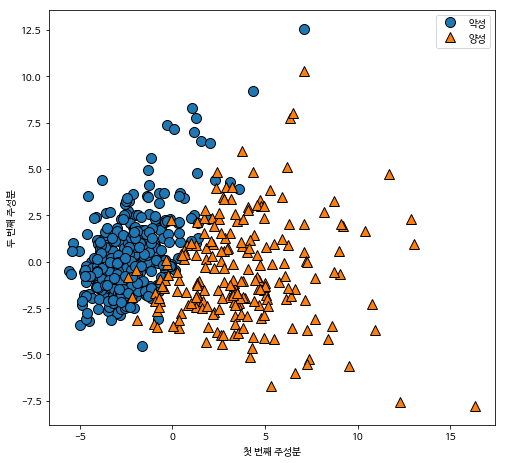

In [24]:
import mglearn
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(x_pca[:,0], x_pca[:,1], bcancer_y)
plt.legend(["악성","양성"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")
plt.show()

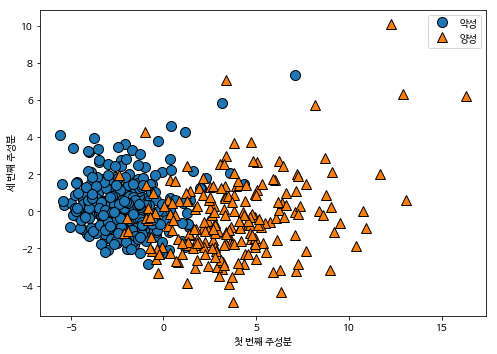

In [25]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(x_pca[:,0], x_pca[:,2], bcancer_y)
plt.legend(["악성","양성"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("첫 번째 주성분")
plt.ylabel("세 번째 주성분")
plt.show()